<div align="center">

# 🛒 Amazon Sales Data Analysis Project  
### by Jatin Rana

</div>



## DATA INGESTION AND PROFILING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
amazon=pd.read_csv("Amazon Sale Report.csv",parse_dates=["Date"])
print(amazon.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128976 non-null  int64         
 1   Order ID            128976 non-null  object        
 2   Date                128976 non-null  datetime64[ns]
 3   Status              128976 non-null  object        
 4   Fulfilment          128976 non-null  object        
 5   Sales Channel       128976 non-null  object        
 6   ship-service-level  128976 non-null  object        
 7   Category            128976 non-null  object        
 8   Size                128976 non-null  object        
 9   Courier Status      128976 non-null  object        
 10  Qty                 128976 non-null  int64         
 11  currency            121176 non-null  object        
 12  Amount              121176 non-null  float64       
 13  ship-city           128941 no

C:\Users\xboxj\AppData\Local\Temp\ipykernel_7456\2308174184.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  amazon=pd.read_csv("Amazon Sale Report.csv",parse_dates=["Date"])


In [2]:
amazon.head

<bound method NDFrame.head of          index             Order ID       Date                        Status  \
0            0  405-8078784-5731545 2022-04-30                     Cancelled   
1            1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   
2            2  404-0687676-7273146 2022-04-30                       Shipped   
3            3  403-9615377-8133951 2022-04-30                     Cancelled   
4            4  407-1069790-7240320 2022-04-30                       Shipped   
...        ...                  ...        ...                           ...   
128971  128970  406-6001380-7673107 2022-05-31                       Shipped   
128972  128971  402-9551604-7544318 2022-05-31                       Shipped   
128973  128972  407-9547469-3152358 2022-05-31                       Shipped   
128974  128973  402-6184140-0545956 2022-05-31                       Shipped   
128975  128974  408-7436540-8728312 2022-05-31                       Shipped   

       Fu

## UNDERSTANDING OF DATA

In [3]:
amazon.shape

(128976, 21)

In [4]:
print(amazon.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128976 non-null  int64         
 1   Order ID            128976 non-null  object        
 2   Date                128976 non-null  datetime64[ns]
 3   Status              128976 non-null  object        
 4   Fulfilment          128976 non-null  object        
 5   Sales Channel       128976 non-null  object        
 6   ship-service-level  128976 non-null  object        
 7   Category            128976 non-null  object        
 8   Size                128976 non-null  object        
 9   Courier Status      128976 non-null  object        
 10  Qty                 128976 non-null  int64         
 11  currency            121176 non-null  object        
 12  Amount              121176 non-null  float64       
 13  ship-city           128941 no

## DATA CLEANING

In [5]:
amazon.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [6]:
#so there is mising values in cloumn currency,amount,ship-city,ship-state,ship-country etc

In [7]:
amazon.dtypes

index                          int64
Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Category                      object
Size                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code             float64
ship-country                  object
B2B                             bool
fulfilled-by                  object
New                          float64
PendingS                     float64
dtype: object

In [8]:
amazon.columns = amazon.columns.str.strip().str.lower().str.replace(' ','_')

In [9]:
amazon.columns

Index(['index', 'order_id', 'date', 'status', 'fulfilment', 'sales_channel',
       'ship-service-level', 'category', 'size', 'courier_status', 'qty',
       'currency', 'amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'b2b', 'fulfilled-by', 'new', 'pendings'],
      dtype='object')

In [10]:

amazon.columns = amazon.columns.str.replace('-','_')

In [11]:
amazon.columns

Index(['index', 'order_id', 'date', 'status', 'fulfilment', 'sales_channel',
       'ship_service_level', 'category', 'size', 'courier_status', 'qty',
       'currency', 'amount', 'ship_city', 'ship_state', 'ship_postal_code',
       'ship_country', 'b2b', 'fulfilled_by', 'new', 'pendings'],
      dtype='object')

In [12]:
amazon = amazon.dropna(subset=['ship_country','ship_postal_code','ship_city', 'ship_state'], how='all')

In [13]:
amazon['ship_city'].shape

(128941,)

In [14]:
#so all of the nan values are removed

In [15]:
amazon.loc[:, "fulfilled_by"] = amazon["fulfilled_by"].fillna('Amazon')



In [16]:
amazon["fulfilled_by"].info

<bound method Series.info of 0         Easy Ship
1         Easy Ship
2            Amazon
3         Easy Ship
4            Amazon
            ...    
128971       Amazon
128972       Amazon
128973       Amazon
128974       Amazon
128975       Amazon
Name: fulfilled_by, Length: 128941, dtype: object>

In [17]:
print(amazon.isnull().sum())


index                      0
order_id                   0
date                       0
status                     0
fulfilment                 0
sales_channel              0
ship_service_level         0
category                   0
size                       0
courier_status             0
qty                        0
currency                7798
amount                  7798
ship_city                  0
ship_state                 0
ship_postal_code           0
ship_country               0
b2b                        0
fulfilled_by               0
new                   128941
pendings              128941
dtype: int64


In [18]:
#so there is no missing values in fulfilled_by1

In [19]:
amazon.loc[:,"ship_state"] = amazon["ship_state"].str.lower()

In [20]:
amazon.loc[:,"ship_city"] = amazon["ship_state"].str.strip().str.lower()

In [21]:
amazon.loc[:,"ship_state"]=amazon["ship_state"].str.replace(r'^Punjab.*',"Punjab",regex=True)

In [22]:
amazon.loc[:,"ship_state"] = amazon["ship_state"].replace({"Ar" : "Arunachal Pradesh","Nl" : "Nagaland","Pondicherry" : "Puducherry",
                "Rj" :"Rajasthan","Rajshthan" : "Rajasthan","Rajsthan" : "Rajasthan","Pb" : "Punjab", "Orissa" : "Odisha"})

In [23]:

amazon.loc[:,"ship_postal_code"] = amazon["ship_postal_code"].astype(int)

In [24]:
amazon.loc[amazon['status']=='cancelled','qty']=0

In [25]:
amazon.loc[amazon['status']=='cancelled','amount']=0

In [26]:
mean_amount = amazon.loc[(amazon['status'] != 'Cancelled') & (amazon['amount'] > 0), 'amount'].mean()

In [27]:
mask = (amazon['status'] != 'Cancelled') & ((amazon['amount'].isna()) | (amazon['amount'] == 0))
amazon.loc[mask, 'amount'] = mean_amount

In [28]:
amazon.loc[:,'date'] = pd.to_datetime(amazon['date'])

In [29]:
amazon[["qty","amount"]].describe()

,qty,amount
count,128941.000000,121372.000000
mean,0.904414,661.407205
std,0.313356,265.785566
min,0.000000,199.000000
25%,1.000000,459.000000
50%,1.000000,626.000000
75%,1.000000,788.000000
max,15.000000,5584.000000


In [30]:
amazon.describe(include='object')

,order_id,status,fulfilment,sales_channel,ship_service_level,category,size,courier_status,currency,ship_city,ship_state,ship_country,fulfilled_by
count,128941,128941,128941,128941,128941,128941,128941,128941,121143,128941,128941,128941,128941
unique,120201,13,2,2,2,9,11,4,1,47,47,1,2
top,171-5057375-2831560,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,INR,maharashtra,maharashtra,IN,Amazon
freq,12,77797,89691,128817,88608,50280,22366,109458,121143,22272,22272,128941,89691


In [31]:
mapping = {
    'Cancelled': 'Cancelled',
    'Pending': 'Pending',
    'Pending - Waiting for Pick Up': 'Pending',
    'Shipped': 'Shipped',
    'Shipped - Damaged': 'Returned/Damaged',
    'Shipped - Delivered to Buyer': 'Delivered',
    'Shipped - Lost in Transit': 'Returned/Damaged',
    'Shipped - Out for Delivery': 'Shipped',
    'Shipped - Picked Up': 'Shipped',
    'Shipped - Rejected by Buyer': 'Returned/Damaged',
    'Shipped - Returned to Seller': 'Returned/Damaged',
    'Shipped - Returning to Seller': 'Returned/Damaged',
    'Shipping': 'Shipped'
}
amazon.loc[amazon["ship_country"] == "India", "status"] = amazon.loc[amazon["ship_country"] == "India", "status"].replace(mapping)


In [32]:
def cov(row):
    if row == False:
        return 'No'
    else:
        return 'Yes'
        

amazon.loc[amazon["ship_country"] == "India", "b2b"] = \
    amazon.loc[amazon["ship_country"] == "India", "b2b"].apply(lambda x: 'Yes' if x else 'No')


## Outliers Detection

In [33]:
def iqr_bounds(s):
    q1,q3=s.quantile([0.25,0.50])
    iqr=q3-q1
    return q1-1.5*iqr,q3+1.5*iqr


In [34]:
for col in ['amount']:
    lo, hi = iqr_bounds(amazon[col])
    outliers = ((amazon[col] < lo) | (amazon[col] > hi)).mean()
    outliers
    print(col, "outlier rate:", round(outliers*100,2), "%")

            

amount outlier rate: 16.6 %


In [35]:
q1, q3 = amazon['amount'].quantile([0.25, 0.75])
iqr = q3 - q1
lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr

# Filter outliers
outliers = amazon[(amazon['amount'] < lower) | (amazon['amount'] > upper)]
print("Outliers count:", len(outliers))

Outliers count: 3747


## FEATURE ENGINEERING

In [36]:
amazon["year"]=amazon["date"].dt.year
amazon["month"] = amazon["date"].dt.month
amazon["day_name"] = amazon["date"].dt.day_name()

C:\Users\xboxj\AppData\Local\Temp\ipykernel_7456\291923834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon["year"]=amazon["date"].dt.year
C:\Users\xboxj\AppData\Local\Temp\ipykernel_7456\291923834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon["month"] = amazon["date"].dt.month
C:\Users\xboxj\AppData\Local\Temp\ipykernel_7456\291923834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [37]:
copy={
    "Sunday":"weekend",
    "saturday":"weekend",
    'Monday' : 'Weekday',
    'Tuesday' : 'Weekday',
    'Wednesday' : 'Weekday',
    'Thursday' : 'Weekday',
    'Friday' : 'Weekday'
}
amazon["weekend_weekdays"]=amazon["day_name"].map(copy)
        

C:\Users\xboxj\AppData\Local\Temp\ipykernel_7456\2750000386.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon["weekend_weekdays"]=amazon["day_name"].map(copy)


## univariate analysis

In [38]:
amazon_vis = amazon.copy()
amazon_vis['amount_clipped'] = amazon['amount'].clip(upper=upper)
amazon_vis = amazon_vis[amazon_vis["amount_clipped"] > 0]
import seaborn as sns


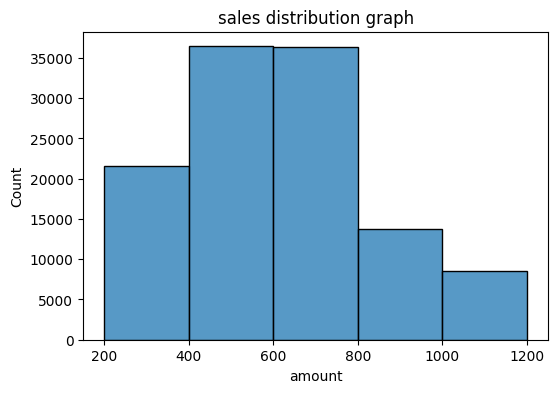

In [39]:
plt.figure(figsize=(6,4))
sns.histplot(x="amount_clipped",data=amazon_vis,bins=[200,400,600,800,1000,1200])
plt.title("sales distribution graph")
plt.xlabel("amount")
plt.show()

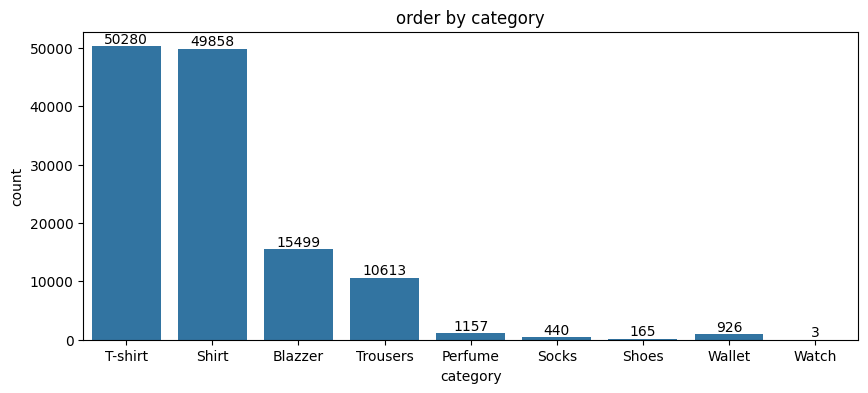

In [40]:
plt.figure(figsize=(10,4))
ax=sns.countplot(x="category",data=amazon)
plt.title("order by category")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


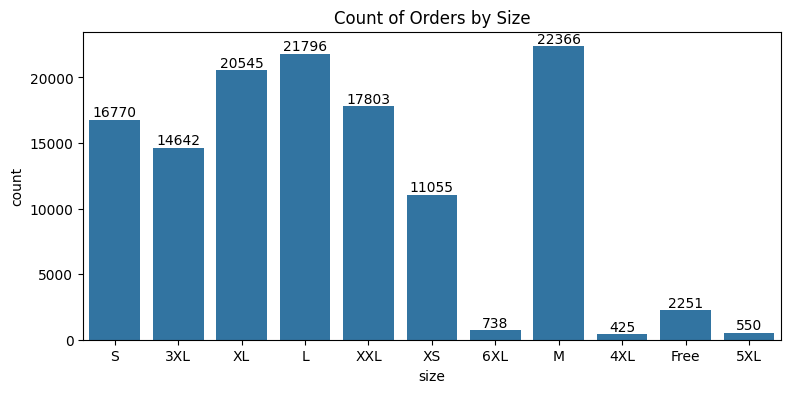

In [41]:
plt.figure(figsize=(9,4))
ax = sns.countplot(x="size",data=amazon)
plt.title("Count of Orders by Size")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

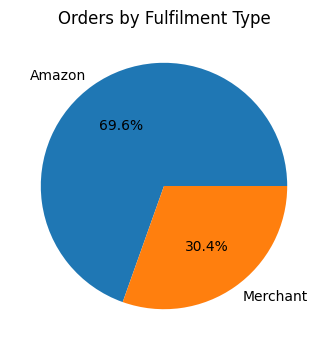

In [42]:
fulfil_counts = amazon['fulfilment'].value_counts()
plt.figure(figsize=(5,4))
plt.pie(fulfil_counts, labels=fulfil_counts.index,autopct='%1.1f%%')
plt.title('Orders by Fulfilment Type')
plt.show()

In [43]:
amazon["b2b"].value_counts()

b2b
False    128069
True        872
Name: count, dtype: int64

## BIVARIATE ANALYSIS

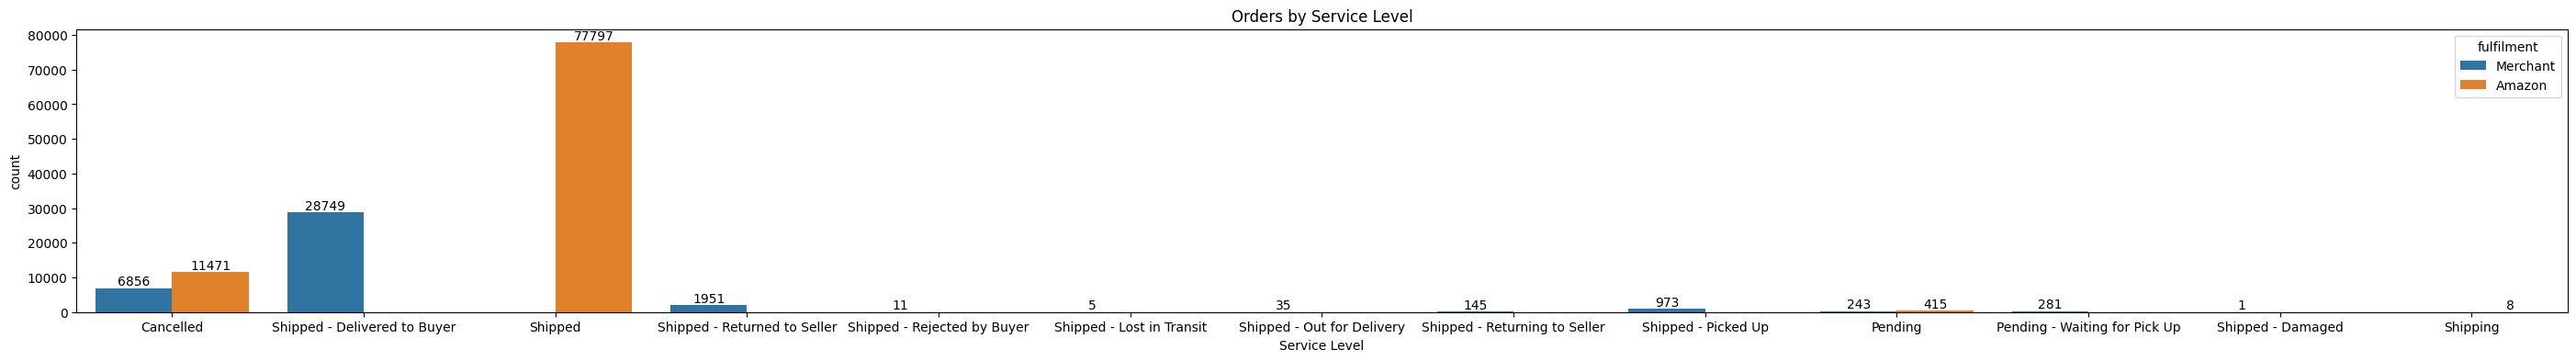

In [44]:
plt.figure(figsize=(35,4))
a=sns.countplot(x='status',data=amazon,hue='fulfilment')
plt.title("Orders by Service Level")
plt.xlabel("Service Level")
for bars in a.containers:
    a.bar_label(bars)
plt.show()

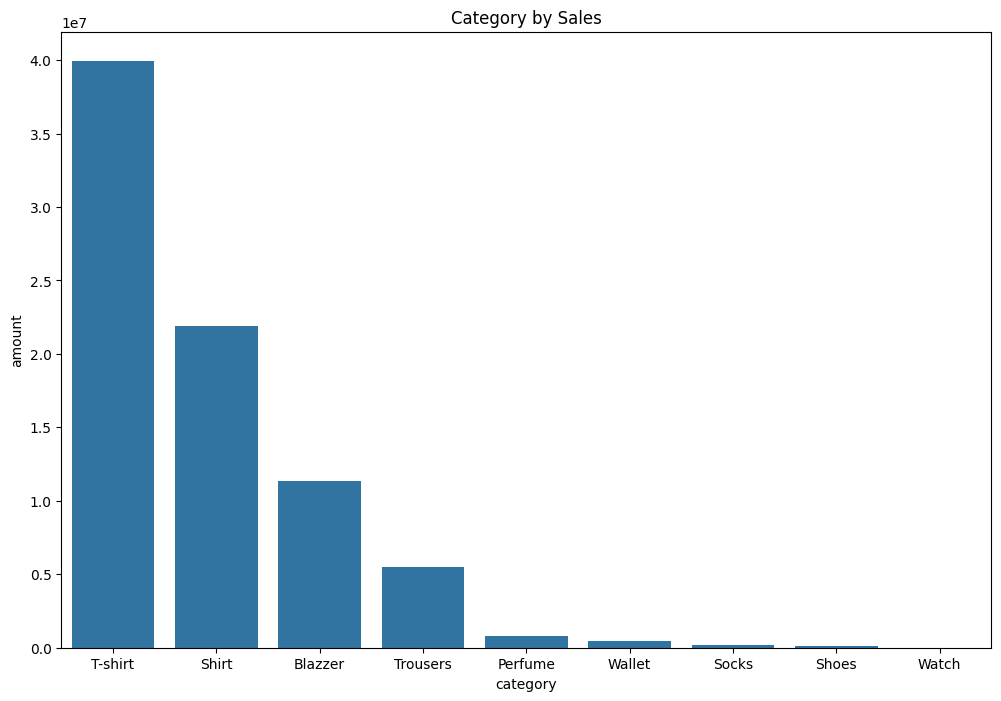

In [45]:
cat=amazon.groupby("category", as_index=False)["amount"].sum().sort_values(by='amount',ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x='category',y='amount',data=cat)
plt.title("Category by Sales")
plt.show()

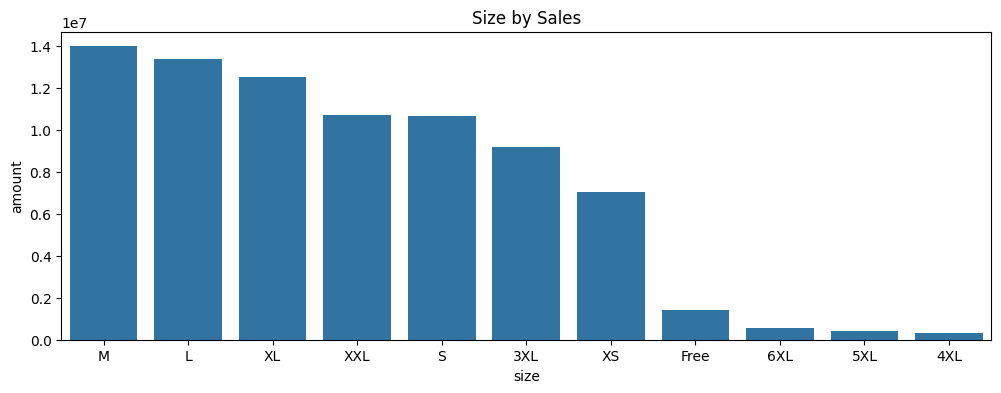

In [46]:
sales_state = amazon.groupby(["size"],as_index=False)["amount"].sum().sort_values(by="amount",ascending=False)
plt.figure(figsize=(12,4))
sns.barplot(x="size",y="amount",data=sales_state)
plt.title("Size by Sales")
plt.show()

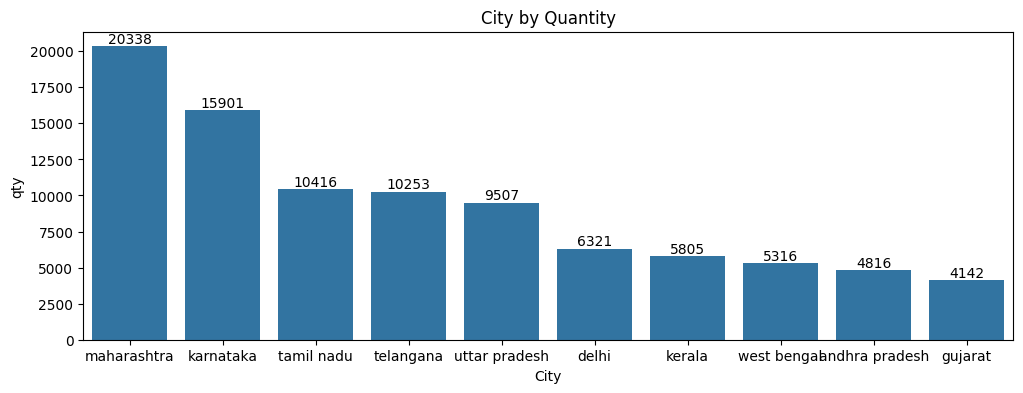

In [47]:
orders_city = amazon.groupby(["ship_city"], as_index =False)["qty"].sum().sort_values(by="qty",ascending=False).head(10)
plt.figure(figsize=(12,4))
ax = sns.barplot(x ='ship_city',y ='qty', data = orders_city)
plt.title('City by Quantity')
plt.xlabel('City')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

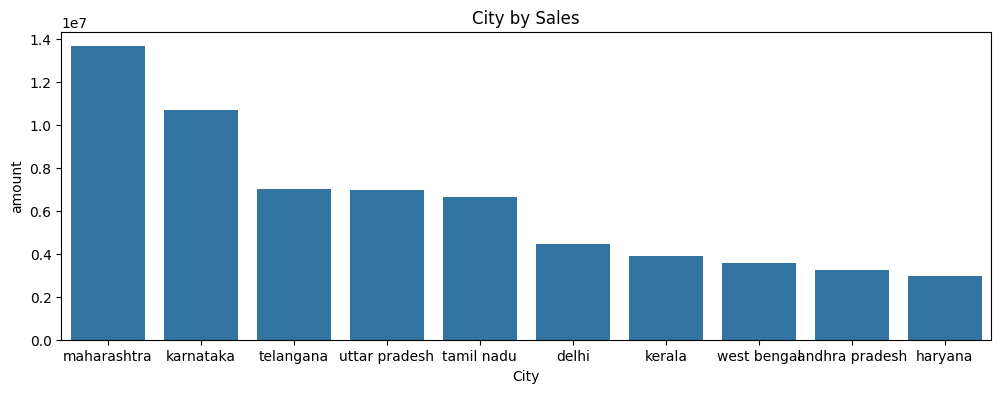

In [48]:
sales_city = amazon.groupby(["ship_city"],as_index=False)["amount"].sum().sort_values(by="amount",ascending=False).head(10)
plt.figure(figsize=(12,4))
sns.barplot(x="ship_city",y="amount",data=sales_city)
plt.title("City by Sales")
plt.xlabel("City")
plt.show()

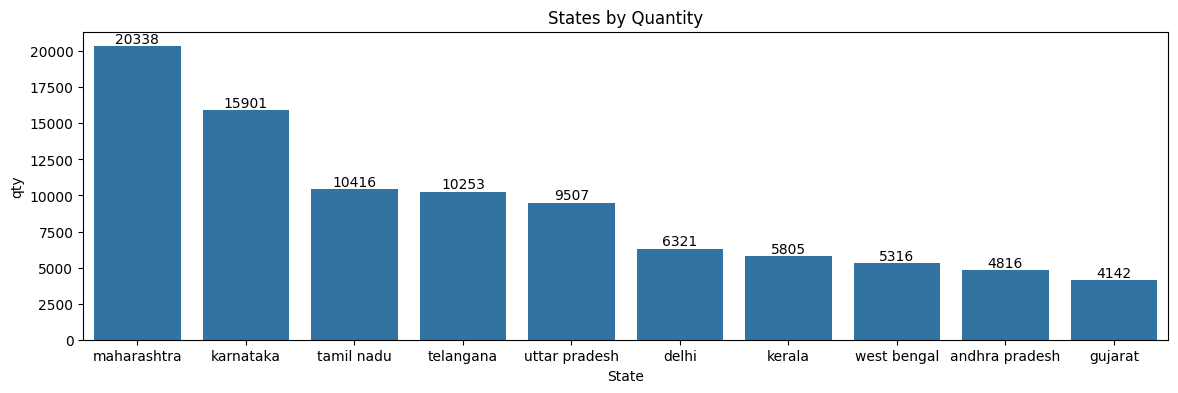

In [49]:
orders_state = amazon.groupby(["ship_state"], as_index =False)["qty"].sum().sort_values(by="qty",ascending=False).head(10)
plt.figure(figsize=(14,4))
ax = sns.barplot(x ='ship_state',y ='qty', data = orders_state)
plt.title('States by Quantity')
plt.xlabel('State')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

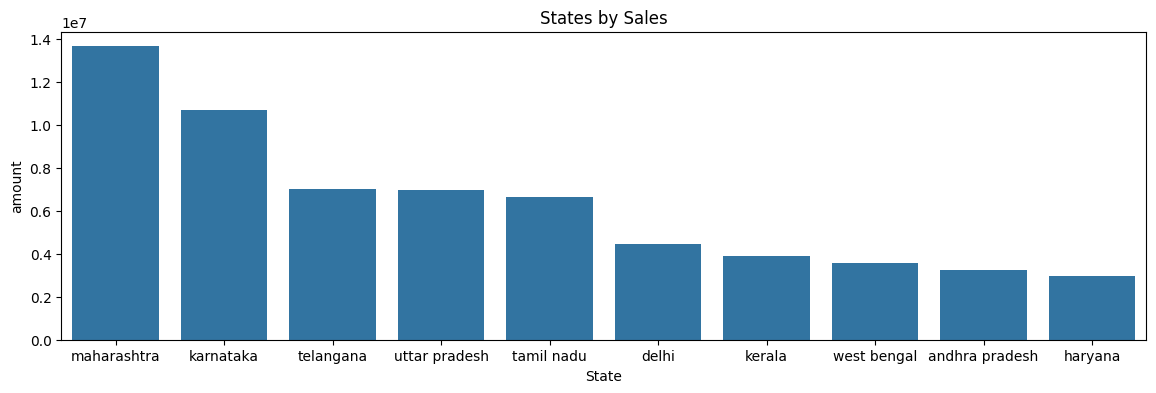

In [50]:
sales_state = amazon.groupby(["ship_state"],as_index=False)["amount"].sum().sort_values(by="amount",ascending=False).head(10)
plt.figure(figsize=(14,4))
sns.barplot(x="ship_state",y="amount",data=sales_state)
plt.title("States by Sales")
plt.xlabel("State")
plt.show()

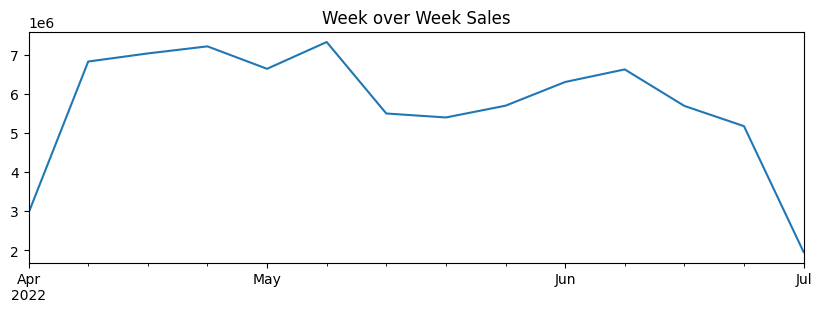

In [51]:
plt.figure(figsize=(10,3))
amazon.set_index('date').resample('W')["amount"].sum().plot()
plt.title("Week over Week Sales")
plt.xlabel(" ")
plt.show()

In [52]:
amazon.to_csv("cleaned_data.csv")